In [17]:
import pandas as pd
import re
import spacy
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
df = pd.read_csv('/content/sample_data/tweets.csv')

df = df['Tweet']
df.head()

all_sentences = []

for word in df:
  all_sentences.append(word)

lines=list()
for line in all_sentences:
  words = line.split()
  for w in words:
    lines.append(w)



In [7]:
lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in lines]

lines2 = []

for word in lines:
  if word != '':
    lines2.append(word)

In [9]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem=[]
for word in lines2:
  stem.append(s_stemmer.stem(word))


In [18]:
#Removing all stopwords
stem2 = []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)


In [119]:
df = pd.DataFrame(stem2)

searchfor = ["urgent","help","pleas","tri","need","vfs","hi","day","week","month","pls", "got", "ani", "ive", "2",
             "sinc","dm","appli","visa","im","thank","cant","asap","date"]
df = df[df[0].str.contains('|'.join(searchfor)) == False]

df = df[0].value_counts()


In [120]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
  freqdoctor[words] += 1

freqdoctor

FreqDist({1: 417, 2: 117, 4: 46, 3: 36, 6: 18, 5: 17, 9: 11, 8: 11, 7: 9, 12: 4, ...})

In [121]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


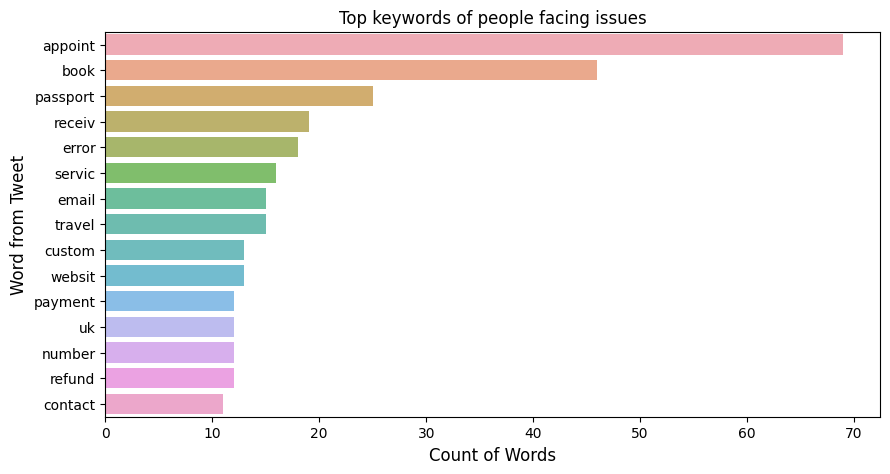

In [125]:
df = df[:15,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top keywords of people facing issues')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()